In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import tensorflow as tf
from tensorflow.keras import datasets,models,layers
import matplotlib.pyplot as plt
%matplotlib inline

## Loading The CIFAR 10 Dataset from inbuilt KerasAPI

In [2]:
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [3]:
x_train.shape

(50000, 32, 32, 3)

50000 train images each of size 32x32 having 3 channels(RGB)

In [4]:
x_test.shape

(10000, 32, 32, 3)

10000 test images having same size as that of input images

#### Converting y to 1-D array so as to access the class names

In [5]:
y_train=y_train.reshape(-1,)
y_test=y_test.reshape(-1,)

In [6]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [7]:
def plot(x,y,index):
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

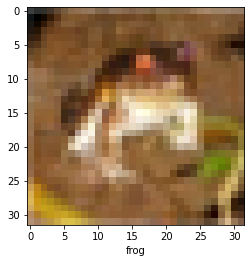

In [8]:
plot(x_train,y_train,0)

In [9]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

#### Normalizing values of x between 0 to 1 by dividing every value of the array by 255

In [10]:
x_train=x_train/255
x_test=x_test/255

## Using ANN for image classification

In [11]:
ann=models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(300,activation='relu'),
    layers.Dense(100,activation='relu'),
    layers.Dense(10,activation='sigmoid')
])
ann.compile(optimizer='adam',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])
ann.fit(x_train,y_train,epochs=30)

Epoch 1/30
1563/1563 [==============================] - 5s 2ms/step - loss: 2.0036 - accuracy: 0.2828
Epoch 2/30
1563/1563 [==============================] - 3s 2ms/step - loss: 1.7133 - accuracy: 0.3849
Epoch 3/30
1563/1563 [==============================] - 3s 2ms/step - loss: 1.6313 - accuracy: 0.4160
Epoch 4/30
1563/1563 [==============================] - 3s 2ms/step - loss: 1.5725 - accuracy: 0.4363
Epoch 5/30
1563/1563 [==============================] - 3s 2ms/step - loss: 1.5353 - accuracy: 0.4496
Epoch 6/30
1563/1563 [==============================] - 3s 2ms/step - loss: 1.5021 - accuracy: 0.4620
Epoch 7/30
1563/1563 [==============================] - 4s 3ms/step - loss: 1.4863 - accuracy: 0.4683
Epoch 8/30
1563/1563 [==============================] - 3s 2ms/step - loss: 1.4661 - accuracy: 0.4784
Epoch 9/30
1563/1563 [==============================] - 3s 2ms/step - loss: 1.4352 - accuracy: 0.4878
Epoch 10/30
1563/1563 [==============================] - 4s 2ms/step - loss: 1.412

In [12]:
ann.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.4399 - accuracy: 0.4979


[1.4398565292358398, 0.49790000915527344]

In [13]:
y_probs=ann.predict(x_test)

In [14]:
y_pred=[np.argmax(element) for element in y_probs]
y_pred[:5]

[3, 1, 1, 8, 4]

## Evaluating Results

In [15]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.46      0.67      0.54       691
           1       0.67      0.57      0.62      1172
           2       0.29      0.40      0.34       720
           3       0.32      0.36      0.34       899
           4       0.47      0.42      0.45      1126
           5       0.26      0.48      0.34       546
           6       0.68      0.45      0.54      1495
           7       0.63      0.48      0.54      1300
           8       0.67      0.59      0.63      1131
           9       0.53      0.57      0.55       920

    accuracy                           0.50     10000
   macro avg       0.50      0.50      0.49     10000
weighted avg       0.53      0.50      0.51     10000



Since we have got an accuracy of only 49% ANN is not suitable for image classification

## Using CNN for image classification

In [16]:
cnn=models.Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

cnn.compile(optimizer='adam',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])
cnn.fit(x_train,y_train,epochs=30)

Epoch 1/30
1563/1563 [==============================] - 7s 3ms/step - loss: 1.6817 - accuracy: 0.3802
Epoch 2/30
1563/1563 [==============================] - 4s 3ms/step - loss: 1.1549 - accuracy: 0.5915
Epoch 3/30
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9870 - accuracy: 0.6555
Epoch 4/30
1563/1563 [==============================] - 4s 3ms/step - loss: 0.9112 - accuracy: 0.6815
Epoch 5/30
1563/1563 [==============================] - 4s 3ms/step - loss: 0.8521 - accuracy: 0.7029
Epoch 6/30
1563/1563 [==============================] - 4s 3ms/step - loss: 0.7824 - accuracy: 0.7259
Epoch 7/30
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7311 - accuracy: 0.7447
Epoch 8/30
1563/1563 [==============================] - 5s 3ms/step - loss: 0.6703 - accuracy: 0.7643
Epoch 9/30
1563/1563 [==============================] - 4s 3ms/step - loss: 0.6471 - accuracy: 0.7753
Epoch 10/30
1563/1563 [==============================] - 4s 3ms/step - loss: 0.615

In [17]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.6275 - accuracy: 0.6762


[1.6274899244308472, 0.6761999726295471]

In [18]:
y_probcnn=cnn.predict(x_test)

In [19]:
y_predcnn=[np.argmax(ele) for ele in y_probcnn]
y_predcnn[0:5]

[3, 1, 8, 8, 6]

In [20]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predcnn))

              precision    recall  f1-score   support

           0       0.70      0.73      0.71      1000
           1       0.80      0.77      0.78      1000
           2       0.66      0.50      0.57      1000
           3       0.47      0.51      0.49      1000
           4       0.60      0.65      0.62      1000
           5       0.57      0.59      0.58      1000
           6       0.75      0.74      0.74      1000
           7       0.70      0.76      0.73      1000
           8       0.83      0.73      0.78      1000
           9       0.72      0.78      0.75      1000

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.68     10000
weighted avg       0.68      0.68      0.68     10000



Now using CNN we have increase our accuracy to 68 percent